# Data Science End End for hotel availability 

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [6]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [7]:
data.shape #checking the shape of the dataset

(2870, 12)

Data is seemingly small and cant be compromised. We have very carefully save all the information available without compromise. 

#  Working with missing data

In [8]:
data.isnull().sum() #shows the missing value counts of each column available in the datset

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

here only reviews_per_month have misssing values which are 676 in number

In [9]:
data['reviews_per_month']  #the missing values column 

0       0.56
1       2.30
2        NaN
3        NaN
4       0.42
        ... 
2865     NaN
2866    0.07
2867    0.67
2868     NaN
2869    0.33
Name: reviews_per_month, Length: 2870, dtype: float64

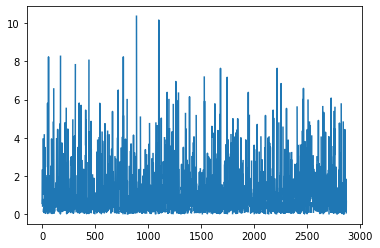

In [10]:
import matplotlib.pyplot as plt
plt.plot(data['reviews_per_month'])  #plotting the missing values column to understand the spread

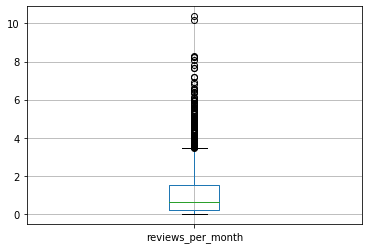

In [11]:
data.boxplot(column=['reviews_per_month']) #plotting a boxplot to understand the statistics of the data

data seems to be highly skewed and we would like to fill this skewed data properly before proceeding with the next steps

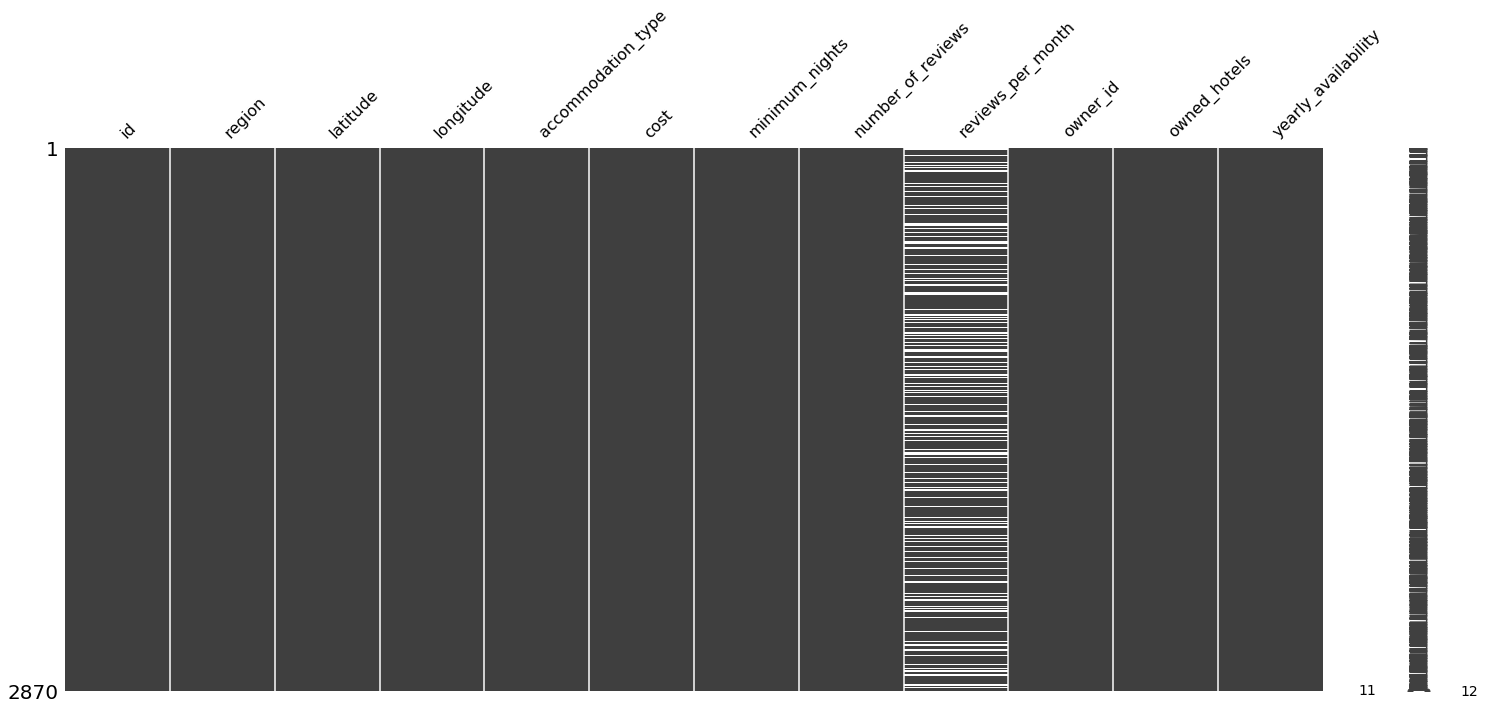

In [12]:
!pip install missingno
import missingno as msno
msno.matrix(data) #using this library to visualize the location of the missing spots

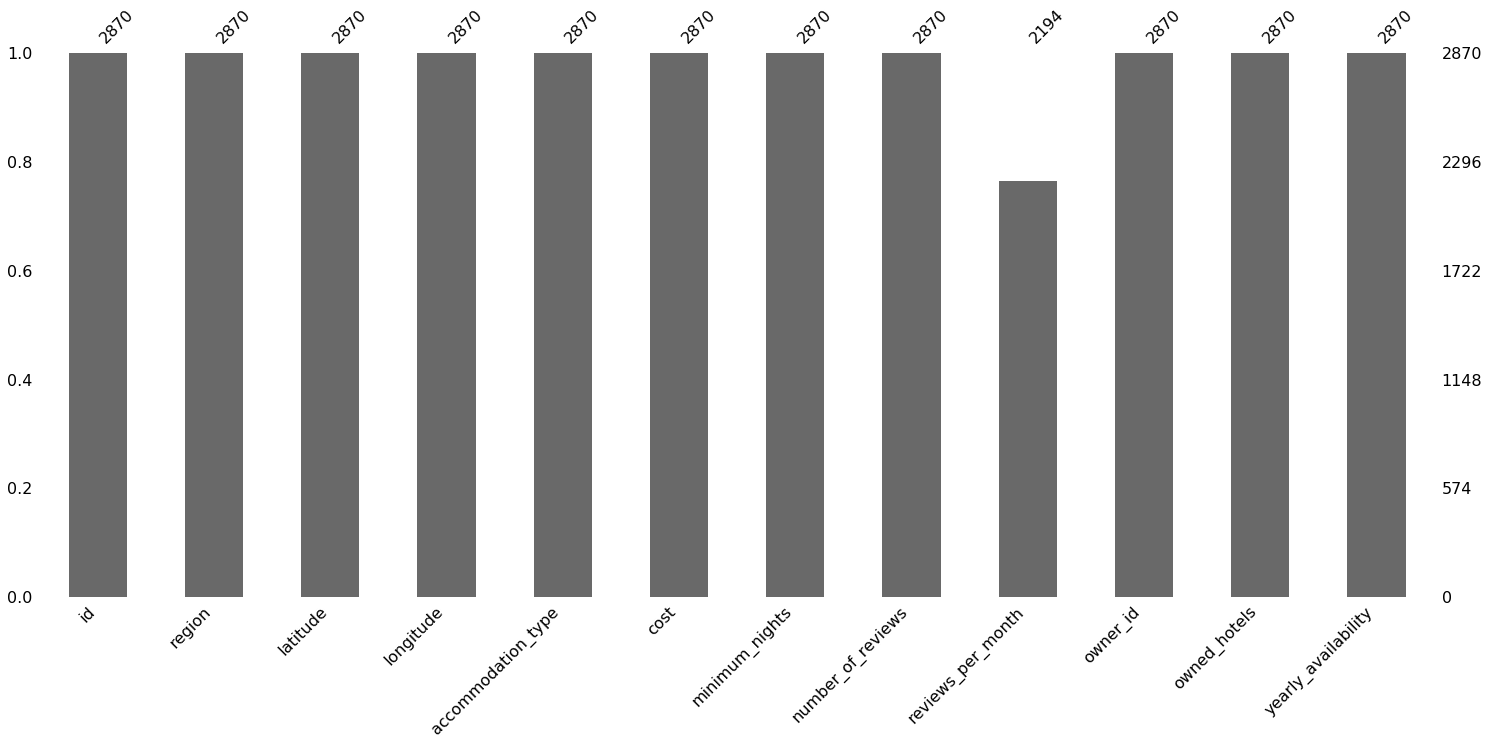

In [13]:
msno.bar(data)  #more easily shows the missing spots visually using a box plot

The msno tool helps see more clearly the location of the missing values and the number of missing values

We know that the median imputation method is preferred if the data is skewed as shown in the boxplot. 

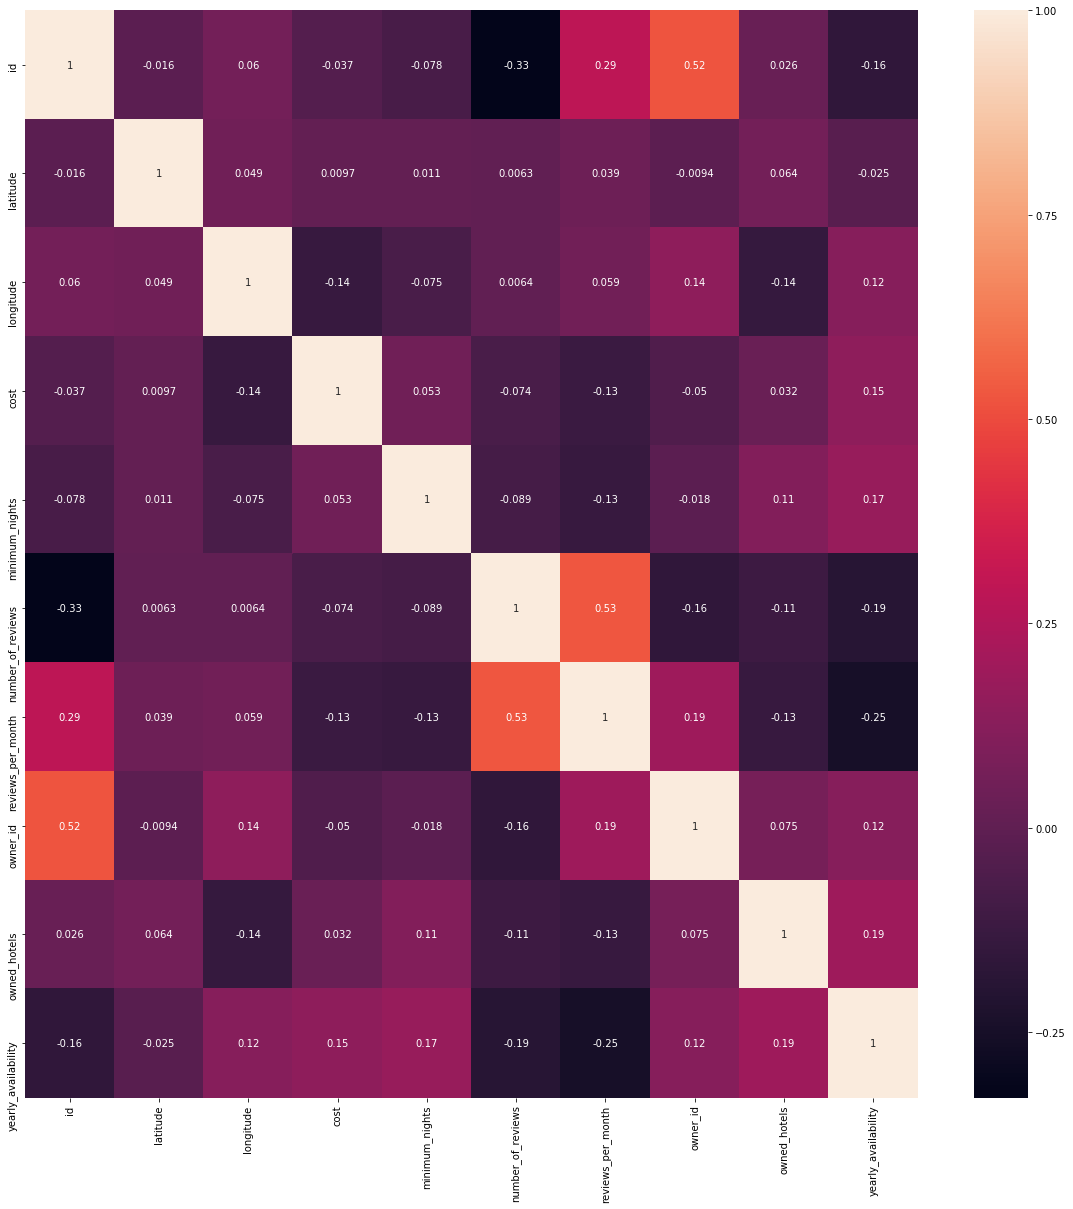

In [14]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)  
#the heatmap shows the correlation of the entire feature set before filling missing values


In [15]:

data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].median())

#filling the missing values with the median of the missing data in the dataset

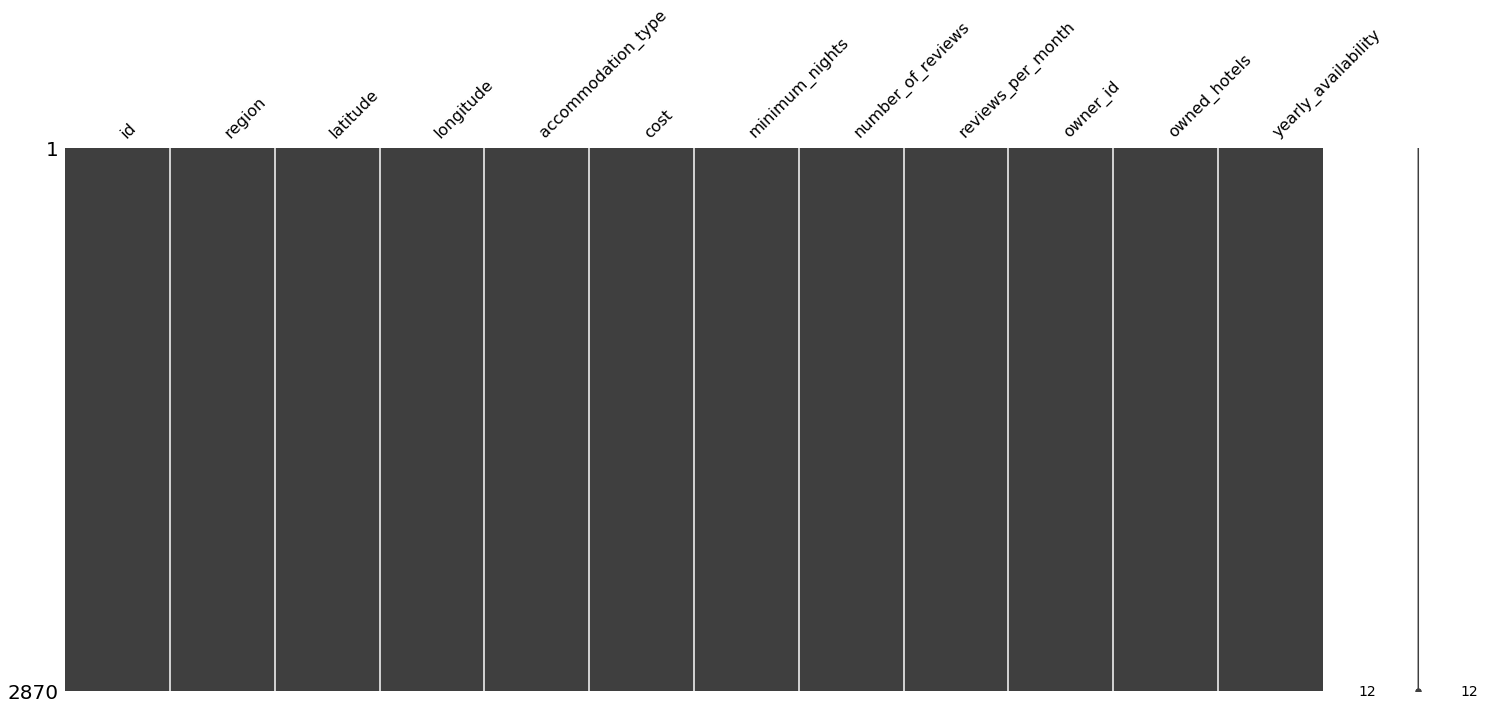

In [16]:
msno.matrix(data) #seeing the plot after filling the dataset with missing values appropriately 

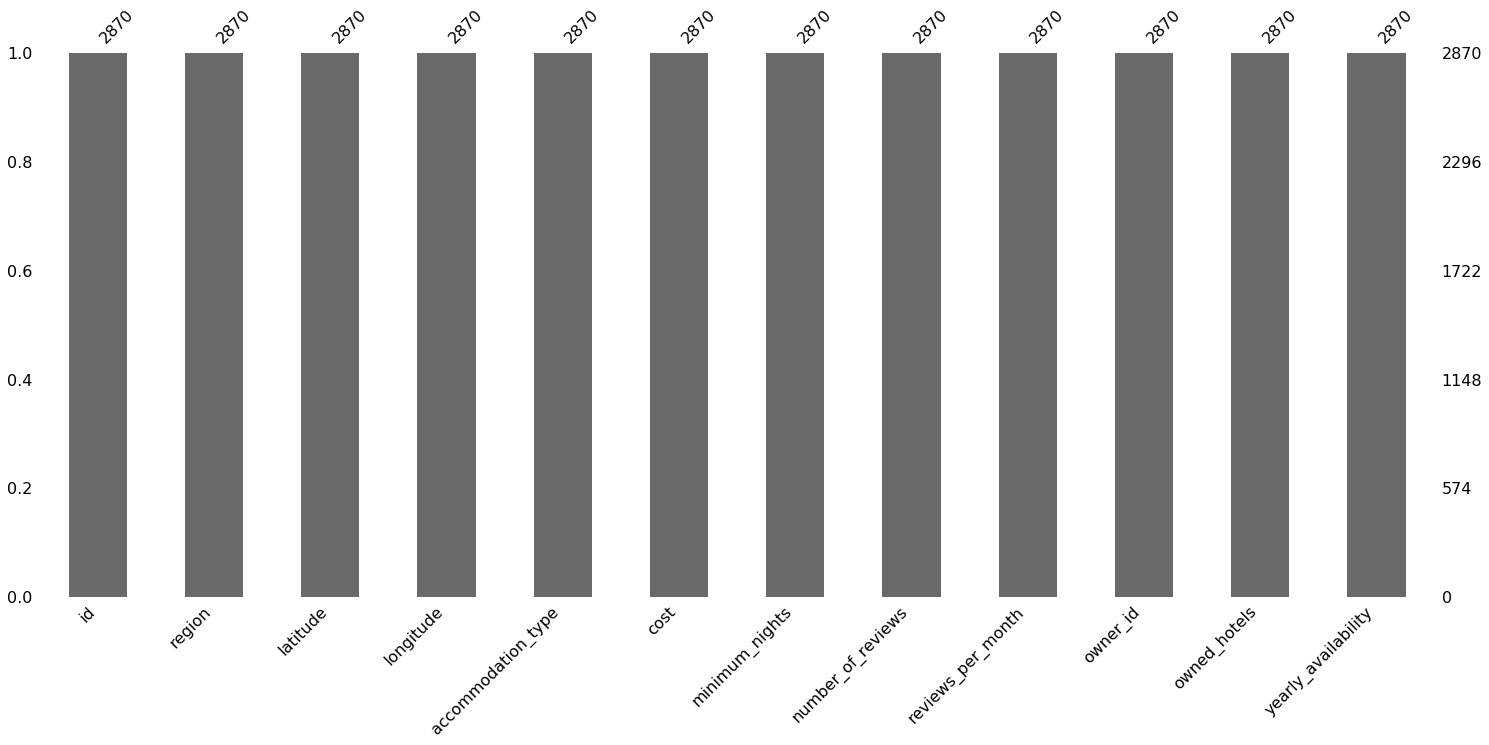

In [17]:
msno.bar(data)

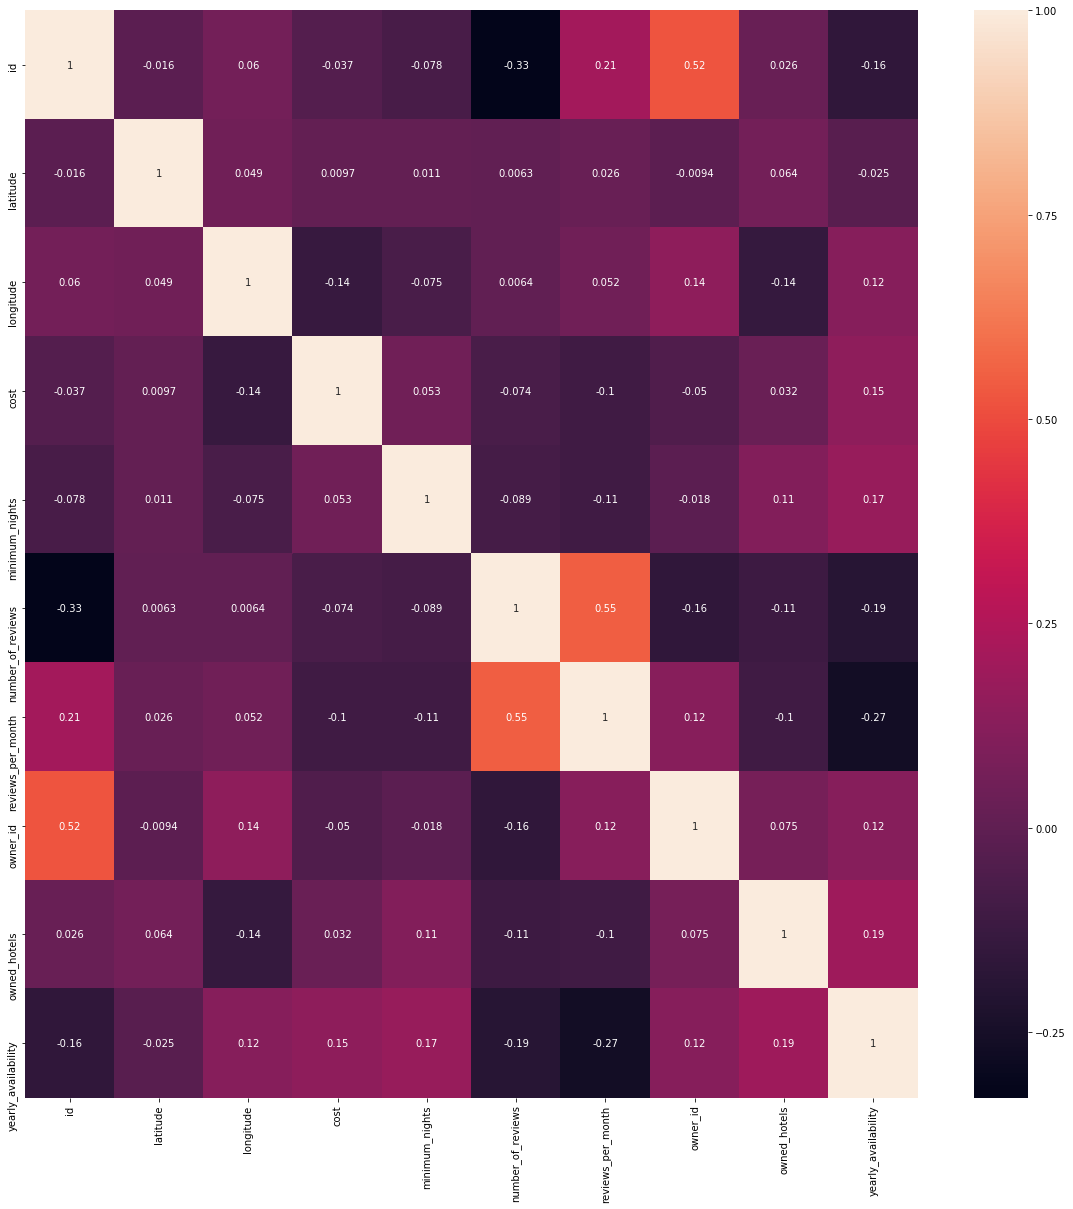

In [18]:
correlation = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)
#the heatmap shows the correlation of the entire feature set after filling missing values


##### here median imputation of the missing values did not change the correlation matrix very drastically, hence its a good method for this data.


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aea28a090>,
      dtype=object)

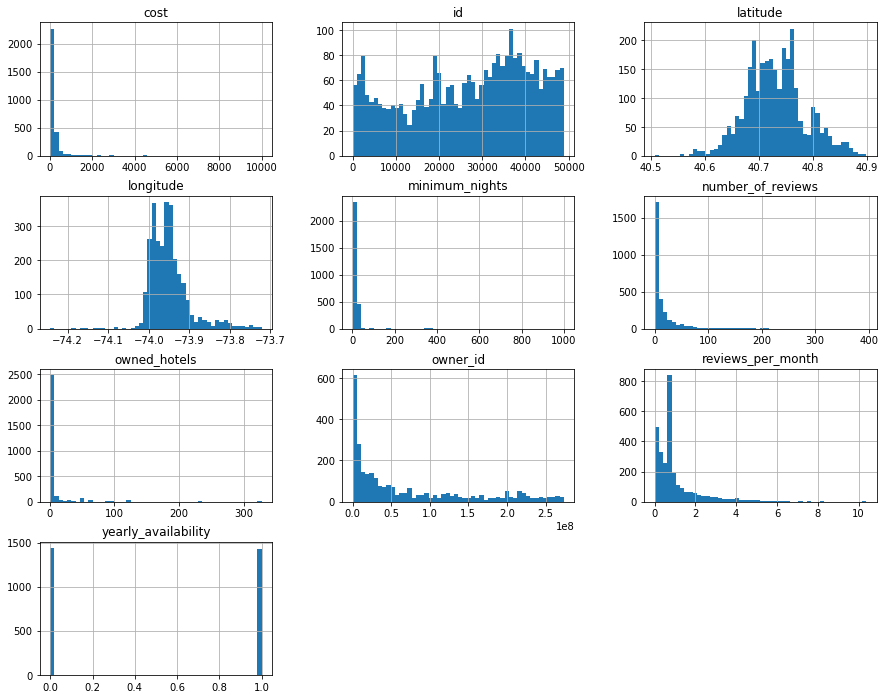

In [19]:
data.hist(bins=50,figsize=[15,12]) #plotting the histograms for each feature to understand its dynamics more accurately

In [20]:
data.info()  #to check the data types of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2870 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


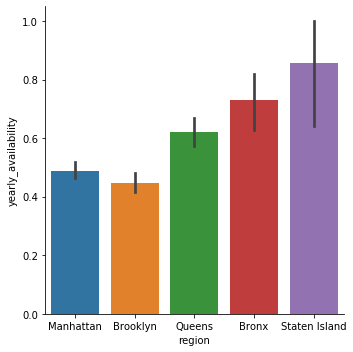

In [21]:
sns.catplot(x ='region',y='yearly_availability',kind ='bar', data=data) 
#realising the categorical data types visually
#also reaslising the effect of the categorical data on the target 

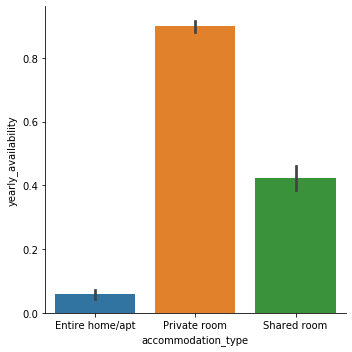

In [22]:
sns.catplot(x ='accommodation_type',y='yearly_availability',kind ='bar', data=data)
#realising the categorical data types visually
#also reaslising the effect of the categorical data on the target 

#### from the available plots above we see that the categorical values do have an impact on the final target that we need to properly predict. Hence we shall use label encoder so as to take the importance of the categorical values as well as opposed to one hot, that neglects it if needed. 

In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['accommodation_type']= labelencoder.fit_transform(data['accommodation_type'])
data['region']=labelencoder.fit_transform(data['region'])


#importing the label encoder to encode the non numerical values for our model to understand

In [24]:
x = data.iloc[:,:-1].values
y= data.iloc[:,-1].values

#splitting the dataset into features and target

In [25]:
x.shape

#realizing the shape of the features

(2870, 11)

In [26]:
y.shape

#realizing the shape of the target

(2870,)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.2,random_state=1)

#splitting the dataset into train and validation 

In [28]:


from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import LinearSVC as lsvc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

dtc_clf = dtc()
rfc_clf = rfc()
lr_clf = lr()
lsvc_clf = lsvc()
gnb_clf = gnb()
gbc_clf = GradientBoostingClassifier()
xgbc_clf  = XGBClassifier()
lgbmc_clf = LGBMClassifier()
cbc_clf = CatBoostClassifier(verbose=0, n_estimators=100)
knn_clf = KNeighborsClassifier(n_neighbors=3)

tuple=(dtc_clf,rfc_clf,lr_clf,lsvc_clf,gnb_clf,gbc_clf,xgbc_clf,lgbmc_clf,cbc_clf,knn_clf)

for clf in tuple:
    clf.fit(x_train,y_train)
    y_validation_prediction = clf.predict(x_validation)
    acc=accuracy_score(y_validation_prediction,y_validation)
    pred = clf.predict(x_validation)
    print('classifier used:', type(clf))
    print('accuracy : ',acc)
    print('\nConfusion Matrix')
    print('----------------')
    
    print(pd.crosstab(y_validation, pred, rownames=['True'], colnames=['Predicted'], margins=True))
    print('Classificiation Report')
    print('---------------------')
    print(classification_report(y_validation, pred))
    print('---------------------')
    

classifier used: <class 'sklearn.tree.tree.DecisionTreeClassifier'>
accuracy :  0.8693379790940766

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          247   34  281
1           41  252  293
All        288  286  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       281
           1       0.88      0.86      0.87       293

    accuracy                           0.87       574
   macro avg       0.87      0.87      0.87       574
weighted avg       0.87      0.87      0.87       574

---------------------
classifier used: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
accuracy :  0.9163763066202091

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          250   31  281
1           17  276  293
All        267  307  574
Classificiation Report
---------------------
              precision    recall  f1

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classifier used: <class 'sklearn.svm.classes.LinearSVC'>
accuracy :  0.5104529616724739

Confusion Matrix
----------------
Predicted    1  All
True               
0          281  281
1          293  293
All        574  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       281
           1       0.51      1.00      0.68       293

    accuracy                           0.51       574
   macro avg       0.26      0.50      0.34       574
weighted avg       0.26      0.51      0.35       574

---------------------
classifier used: <class 'sklearn.naive_bayes.GaussianNB'>
accuracy :  0.5714285714285714

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          158  123  281
1          123  170  293
All        281  293  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.56      0.56 

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


classifier used: <class 'xgboost.sklearn.XGBClassifier'>
accuracy :  0.9337979094076655

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          255   26  281
1           12  281  293
All        267  307  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       281
           1       0.92      0.96      0.94       293

    accuracy                           0.93       574
   macro avg       0.94      0.93      0.93       574
weighted avg       0.93      0.93      0.93       574

---------------------
classifier used: <class 'lightgbm.sklearn.LGBMClassifier'>
accuracy :  0.9337979094076655

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          255   26  281
1           12  281  293
All        267  307  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

        

####################################################################################################################################################################################################################################################################################################################################
classifier used: <class 'xgboost.sklearn.XGBClassifier'>
accuracy :  0.9337979094076655

Confusion Matrix
----------------
    Predicted    0    1  All
    True                    
    0          255   26  281
    1           12  281  293
    All        267  307  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       281
           1       0.92      0.96      0.94       293

    accuracy                            0.93       574
    macro avg       0.94      0.93      0.93       574
    weighted avg    0.93      0.93      0.93       574

---------------------
classifier used: <class 'lightgbm.sklearn.LGBMClassifier'>
accuracy :  0.9337979094076655

Confusion Matrix
----------------
    Predicted    0    1  All
    True                    
    0          255   26  281
    1           12  281  293
    All        267  307  574
Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       281
           1       0.92      0.96      0.94       293

    accuracy                            0.93       574
    macro avg       0.94      0.93      0.93       574
    weighted avg    0.93      0.93      0.93       574

---------------------




HERE WE SEE THAT BOTH THE ABOVE CLASSIFIERS GIVE THE SAME RESULTS SO WE CAN USE EITHER OF THE FOR OUT PREDICTION, IT IS GOOD TO NOTE THAT WE CAN ALSO USE OTHER CLASSFIERS THAT COME CLOSE, LIKE RANDOM FOREST, CATBOOST AND GRADIENT BOOST. BUT FOR NOW WE'LL STICK TO XGBOOST.

### we can evaluate the model more accurately using the ROC curve and the Precision and Recall performances

[21:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


No Skill: ROC AUC=0.500
RFC: ROC AUC=0.976


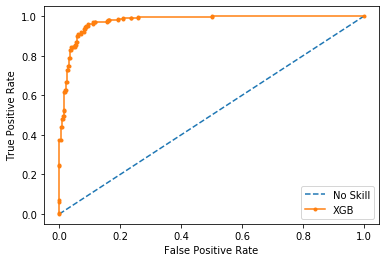

In [29]:
# roc curve and auc
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validation))]

# fit a model
xgbc_clf.fit(x_train, y_train)

# predict probabilities
xgbc_probs = xgbc_clf.predict_proba(x_validation)

# keep probabilities for the positive outcome only
xgbc_probs = xgbc_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validation, ns_probs)
xgb_auc = roc_auc_score(y_validation, xgbc_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (xgb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validation, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_validation, xgbc_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: f1=0.937 auc=0.976


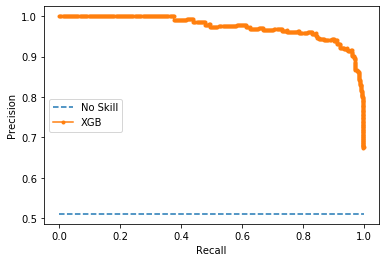

In [30]:
# precision-recall curve and f1
# fit a model
xgbc_clf.fit(x_train, y_train)

# predict probabilities
xgbc_clf_probs = xgbc_clf.predict_proba(x_validation)

# keep probabilities for the positive outcome only
xgbc_clf_probs = xgbc_clf_probs[:, 1]

# predict class values
y_hat = xgbc_clf.predict(x_validation)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_validation, xgbc_clf_probs)
xgb_f1, xbg_auc = f1_score(y_validation, y_hat), auc(xgb_recall, xgb_precision)

# summarize scores
print('XGB: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))

# plot the precision-recall curves
no_skill = len(y_validation[y_validation==1]) / len(y_validation)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGB')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

In [31]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [32]:
test_data['accommodation_type']= labelencoder.fit_transform(test_data['accommodation_type'])
test_data['region']=labelencoder.fit_transform(test_data['region'])


#repeating the cleaning process with the test data given

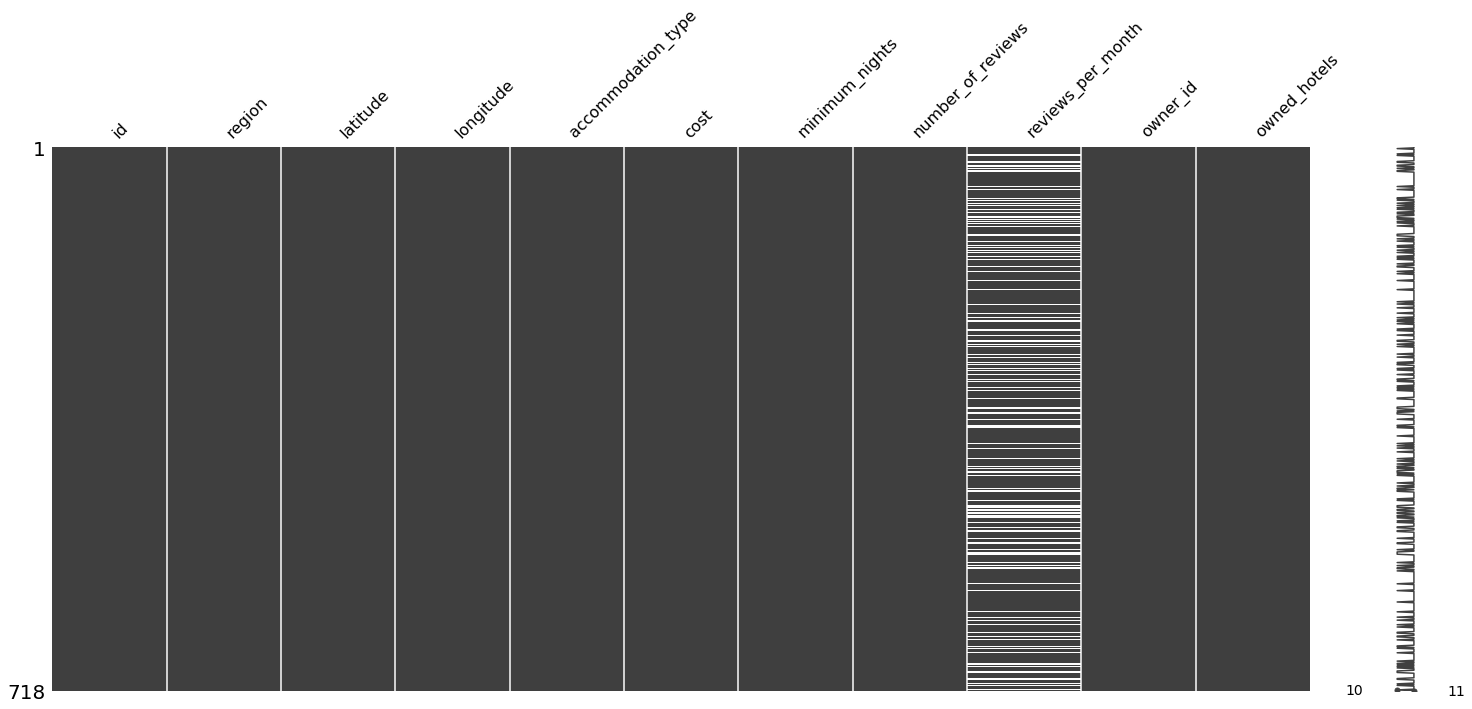

In [33]:
msno.matrix(test_data)

In [34]:
test_data['reviews_per_month'] = test_data['reviews_per_month'].fillna(test_data['reviews_per_month'].median())

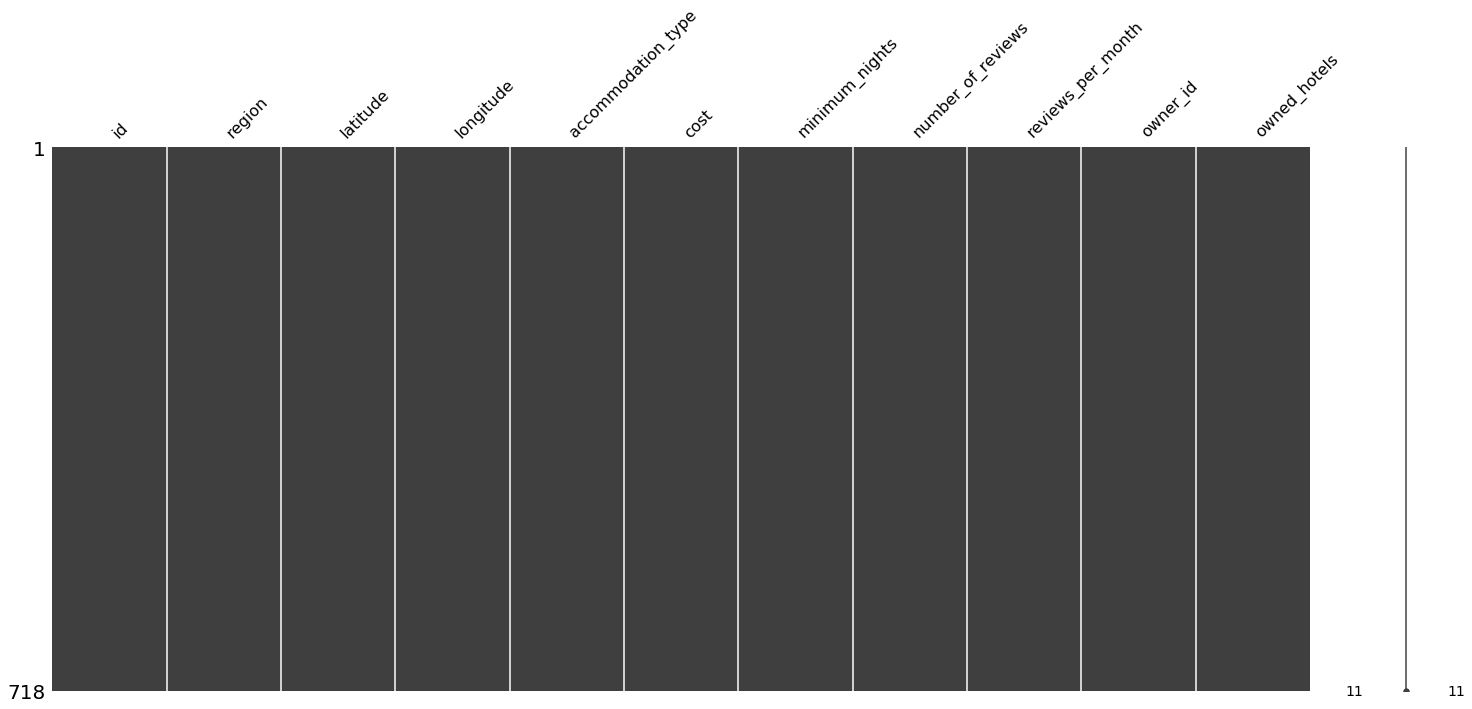

In [35]:
msno.matrix(test_data)

In [36]:
y_test_prediction = xgbc_clf.predict(test_data)
print(y_test_prediction)


#printing the predcition on the test data 

[0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0
 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 0 0 0 0 0 1 1 



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [37]:
X = data.iloc[:,:-1]
Y= data.iloc[:,-1]

#splitting features and target

[0.06689308 0.02780855 0.03776129 0.04508969 0.43361302 0.03699174
 0.03977183 0.07613361 0.06522611 0.04953344 0.12117763]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


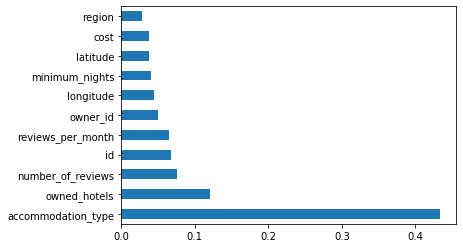

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()


#showing the importances 

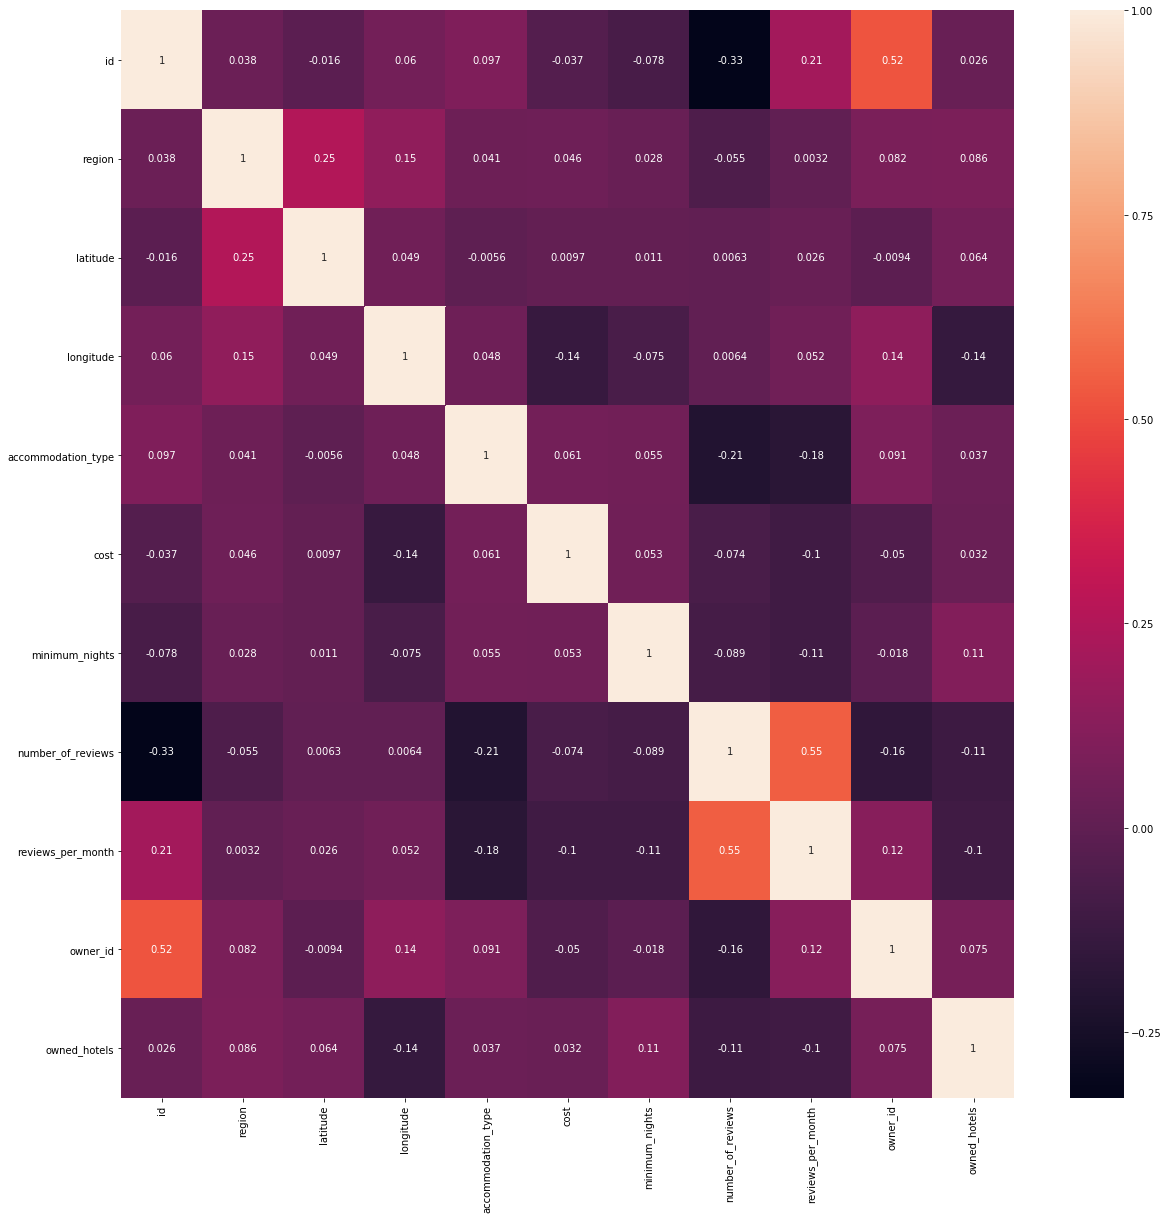

In [39]:
correlation = X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

### here we see that the features are ranked by their most effect and impact on the availability and this data allows the vendor to manage his hotel better by tweaking with the features physically. 

In [40]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(xgbc_clf).fit(x_validation, y_validation)


In [41]:
eli5.show_weights(perm, feature_names = X.columns.tolist(), top=20)


Weight,Feature
0.2777 ± 0.0470,accommodation_type
0.0808 ± 0.0126,owned_hotels
0.0293 ± 0.0153,id
0.0272 ± 0.0155,number_of_reviews
0.0164 ± 0.0036,cost
0.0150 ± 0.0047,owner_id
0.0105 ± 0.0062,minimum_nights
0.0098 ± 0.0111,longitude
0.0087 ± 0.0070,reviews_per_month
0.0017 ± 0.0031,region


In [42]:
import eli5
 

xgbc_clf.fit(X,Y)
eli5.explain_weights(xgbc_clf)


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Weight,Feature
0.6395,accommodation_type
0.1848,owned_hotels
0.0276,number_of_reviews
0.0215,minimum_nights
0.0213,reviews_per_month
0.0212,id
0.0201,latitude
0.0181,longitude
0.0178,cost
0.0151,owner_id


In [43]:
eli5.explain_prediction(xgbc_clf, X.head(1))


Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,\n              gamma=0, gpu_id=-1, importance_type=None,\n              interaction_constraints='', learning_rate=0.300000012,\n              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,\n              monotone_constraints='()', n_estimators=100, n_jobs=2,\n              num_parallel_tree=1, objective='binary:logistic',\n              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,\n              scale_pos_weight=1, subsample=1, tree_method='exact',\n              use_label_encoder=True, validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x4', weight=4.121779092434049, std=None, value=0.0), FeatureWeight(feature='x7', weight=1.3041606067647278, std=None, value=7.0), FeatureWeight(feature='x6', weight=1.0187028711208965, std=None, value=5.0), FeatureWeight(feature='x10', weight=0.7300617644178979, std=None, value=1.0), FeatureWeight(feature='x2', weight=0.6577709073235826, std=None, value=40.71854), FeatureWeight(feature='x3', weight=0.6132971393006319, std=None, value=-74.00439), FeatureWeight(feature='x9', weight=0.5215780653405889, std=None, value=929983.0), FeatureWeight(feature='x5', weight=0.4940743398699482, std=None, value=170.0), FeatureWeight(feature='x0', weight=0.2771823838349083, std=None, value=13232.0), FeatureWeight(feature='x1', weight=0.036664088432066505, std=None, value=2.0), FeatureWeight(feature='x8', weight=0.017077254922919304, std=None, value=0.56)], neg=[FeatureWeight(feature='<BIAS>', weight=-0.016556293892217466, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9999432, score=-9.77579221987, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [44]:
submission_df = pd.DataFrame({"id":test_data["id"],"yearly_availability":y_test_prediction})

In [45]:
submission_df 

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0
...,...,...
713,26801,0
714,20110,0
715,31383,0
716,47135,1


In [46]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

In [47]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---